In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
# DEFINING THE PATH

Path  = r'/Users/ghalebju/Desktop/Data Analysis Format/Part 6'

In [10]:
#importing data set

df = pd.read_csv(os.path.join(Path, 'zomato-last-version','01 Data','prepared data' , 'zomato_clean.csv'), index_col = False)

In [11]:
#exploring data set
df.columns 

Index(['Unnamed: 0', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

/var/folders/s5/185t061116b37123q55fx3hc0000gn/T/ipykernel_45385/921043488.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rate'], bins=25)


<Axes: xlabel='rate', ylabel='Density'>

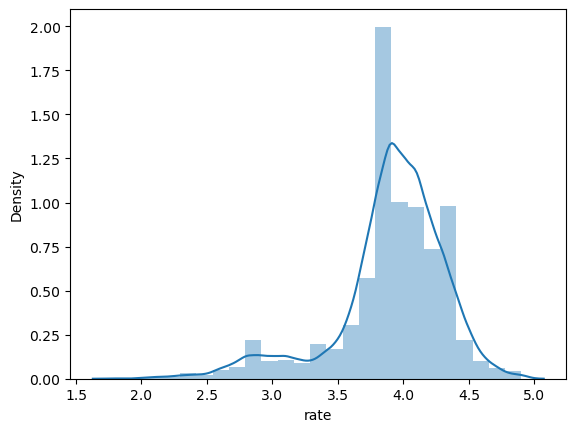

In [12]:
sns.distplot(df['rate'], bins=25)

In [15]:
df['rate'].mean() # Check the mean

3.904336690397638

In [16]:
df['rate'].median() # Check the median

4.0

In [17]:
df['rate'].max() # Check the max

4.9

hypothesis: "restaurants with high cost tend to get better rating up until one point where the cost factor starts to effect negativey on the restaurant's rating"

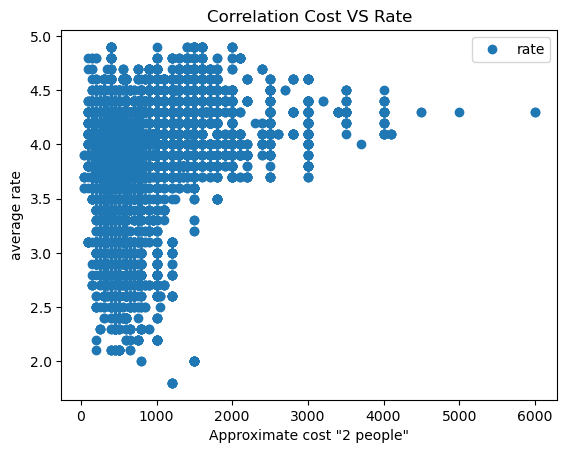

In [18]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'approx_cost(for two people)', y='rate',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Correlation Cost VS Rate')  
plt.xlabel('Approximate cost "2 people"')  
plt.ylabel('average rate')  
plt.show()

In [20]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['approx_cost(for two people)'].values.reshape(-1,1)
y = df['rate'].values.reshape(-1,1)

In [21]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [23]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

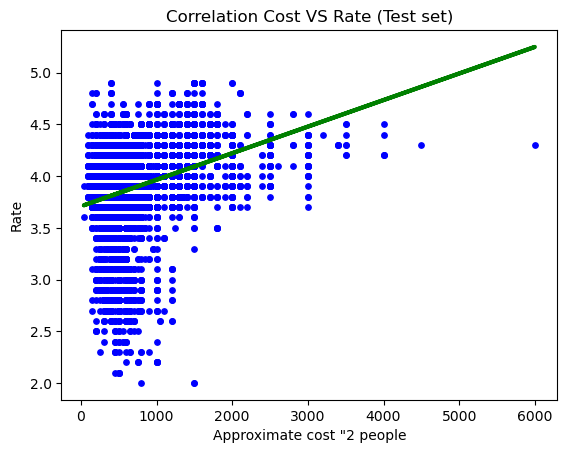

In [25]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='green', linewidth =3)
plot_test.title('Correlation Cost VS Rate (Test set)')
plot_test.xlabel('Approximate cost "2 people')
plot_test.ylabel('Rate')
plot_test.show()

In [26]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [27]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00025693]]
Mean squared error:  0.16020482437106395
R2 score:  0.09778249097342329


In [28]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4.2,3.785152
1,3.9,3.785152
2,4.1,4.170554
3,4.3,4.093474
4,2.7,3.836539
5,3.9,3.862233
6,3.5,3.810846
7,4.0,3.759459
8,4.0,3.810846
9,3.9,3.939313
